# Visualisation of Reconstructed Images

This notebook allows visualisation of examples of reconstructed images from the trained model.

The sample images are selected randomly from the validation set.

In [ ]:
import matplotlib.pyplot as plt
import os
import logging
import tensorflow as tf

os.chdir('..')

from src.utils.data.tfdatasets import load_tf_img_dataset

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

In [2]:
DATASET = 'streets'
INPUT_SIZE = (224, 224)
CMAP = 'viridis'
COLOR_MODE = 'rgb'

In [3]:

dataset = load_tf_img_dataset(
    dir='val',
    dir_path=os.path.join('data', 'processed', DATASET),
    input_size=(224, 224),
    mode='autoencoder',
    scale=255,
    shuffle=True,
    batch_size=2,
    color_mode=COLOR_MODE
)

Found 71 files belonging to 1 classes.


In [4]:
model = tf.keras.models.load_model(
    os.path.join('models', DATASET, 'bin', 'trained_cae.hdf5')
    )

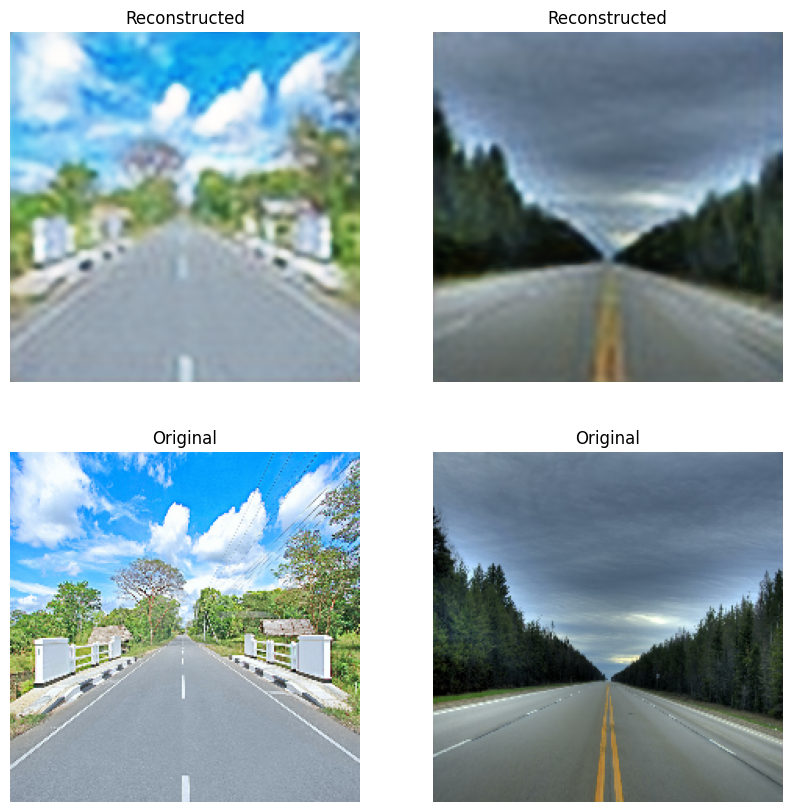

In [5]:
plt.figure(figsize=(10, 10))
for images, _ in dataset:
    for i in range(2):
        ax = plt.subplot(2, 2, i + 1)
        plt.imshow(model(images)[i].numpy(), cmap=CMAP)
        plt.title('Reconstructed')
        plt.axis("off")
        ax = plt.subplot(2, 2, i + 3)
        plt.imshow(images[i].numpy(), cmap=CMAP)
        plt.title('Original')
        plt.axis("off")
    break

plt.show()